In [1]:
import numpy as np
import dask.array as da

### Dask Arrays interface is similar to Numpy API

In [2]:
np_arr = np.random.randint(20, size=20)
np_arr

array([ 1,  9, 11,  5, 17,  2,  4, 15, 10, 18, 15, 14,  8, 18, 14, 14,  8,
       19, 16,  8])

### In this case, we just need to add an additional attribute `chunks`

In [14]:
dask_arr = da.random.randint(20, size=20, chunks=5)

### You will see that the array has not been computed till now

In [15]:
dask_arr

dask.array<randint, shape=(20,), dtype=int64, chunksize=(5,)>

## This is simply because Dask does lazy evaluaion.   
### You need to call `compute()` to start the execution

In [16]:
dask_arr.compute()

array([19,  2, 11,  7,  8, 11,  4,  3, 14, 14, 11,  1,  4,  0, 10, 18, 15,
        2,  7,  2])

### Chunks size 

In [17]:
dask_arr.chunks

((5, 5, 5, 5),)

### Creating arrays from existing data

In [19]:
dask_arr_from_np = da.from_array(np_arr, chunks=5)

In [20]:
dask_arr_from_np

dask.array<array, shape=(20,), dtype=int64, chunksize=(5,)>

In [21]:
dask_arr_from_np.compute()

array([ 1,  9, 11,  5, 17,  2,  4, 15, 10, 18, 15, 14,  8, 18, 14, 14,  8,
       19, 16,  8])

## Dask translates your array operations into a graph to tasks

#### See : http://docs.dask.org/en/latest/graphviz.html

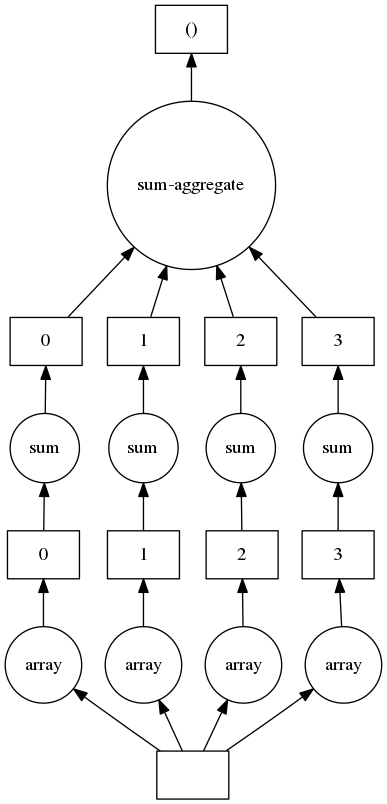

In [22]:
dask_arr_from_np.sum().visualize()

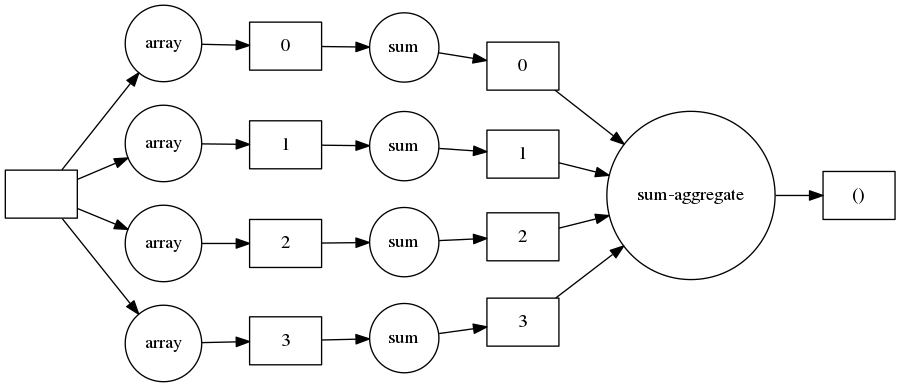

In [24]:
dask_arr_from_np.sum().visualize(rankdir="LR")

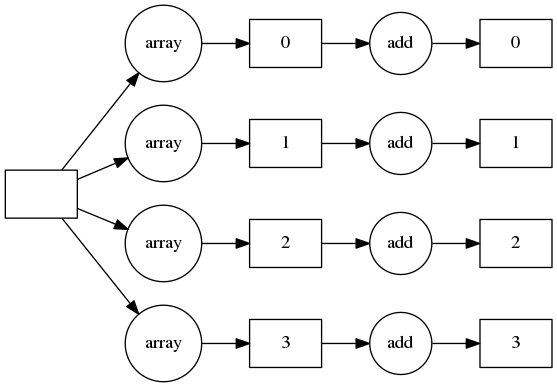

In [25]:
(dask_arr_from_np+1).visualize(rankdir="LR")

In [26]:
dask_arr_mean = da.mean(dask_arr_from_np)
dask_arr_mean.compute()

11.3

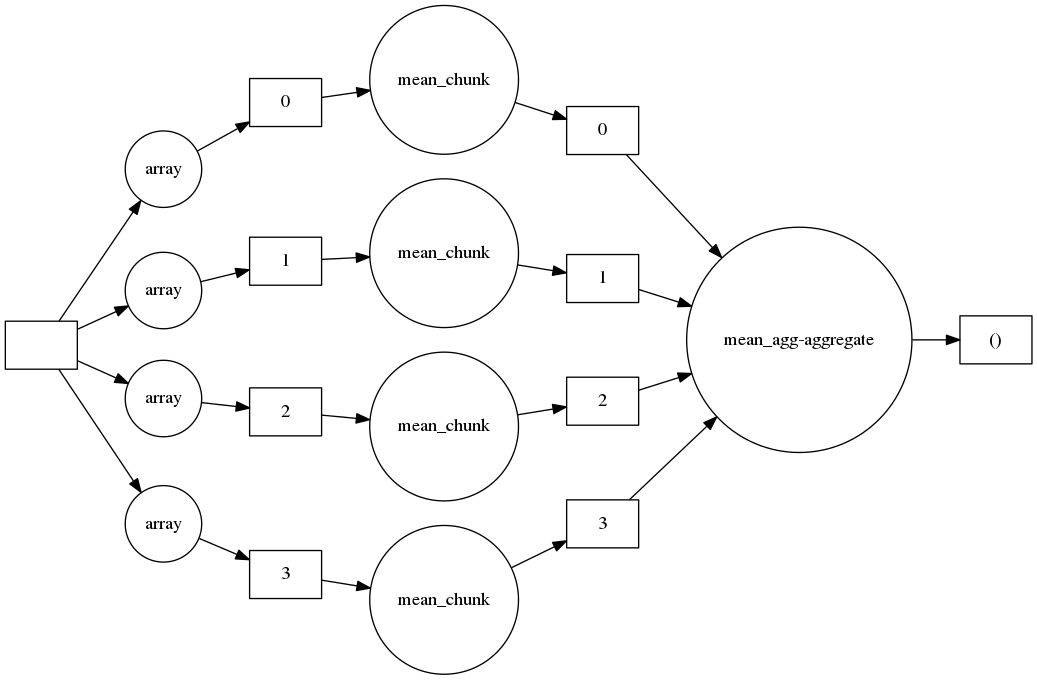

In [27]:
dask_arr_mean.visualize(rankdir="LR")

## Another Example

In [28]:
x = da.random.random(10, chunks=2)
y = da.random.random(10, chunks=2)

sum_x_y = da.add(x, y) #similar to numpy.add
mean_x_y = da.mean(sum_x_y)

In [29]:
sum_x_y.compute()

array([0.89773766, 0.55036394, 0.64279178, 1.81554962, 1.02761758,
       1.26994329, 1.08828603, 0.54444841, 0.18719836, 0.39145131])

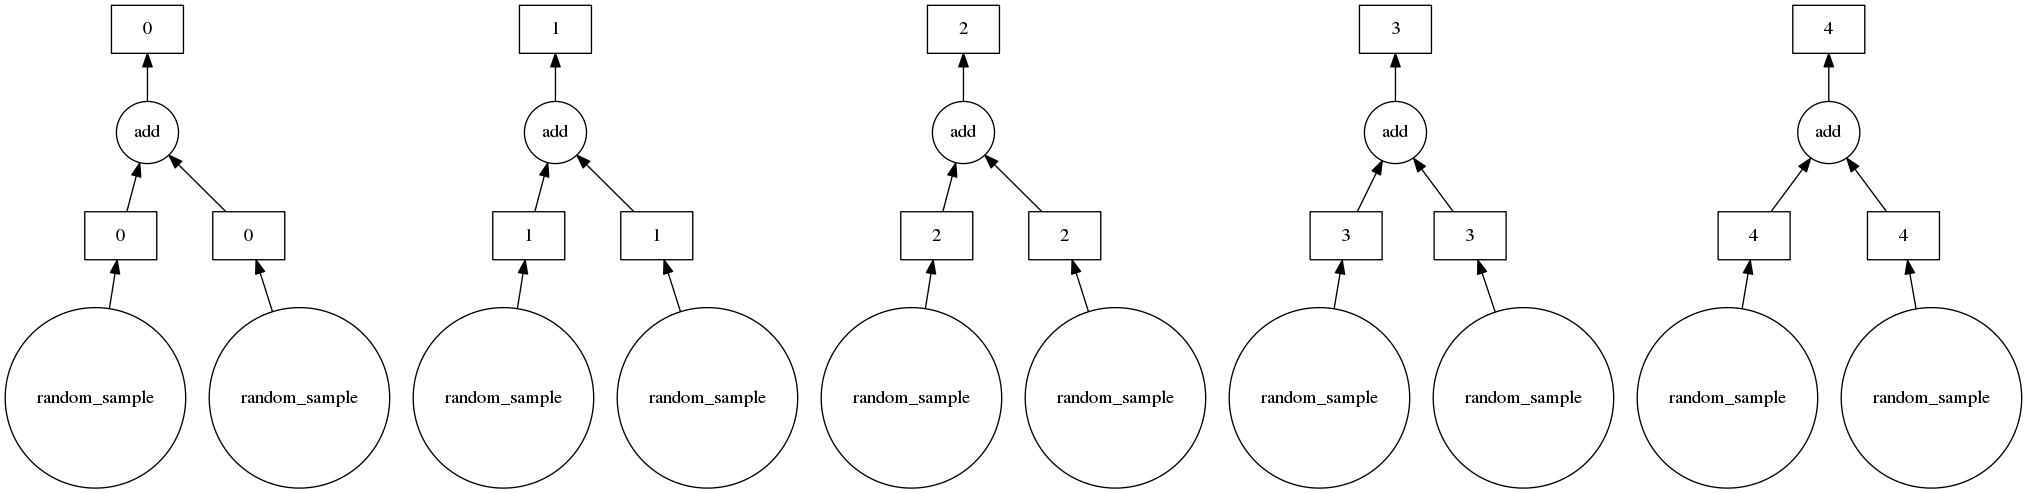

In [30]:
sum_x_y.visualize()

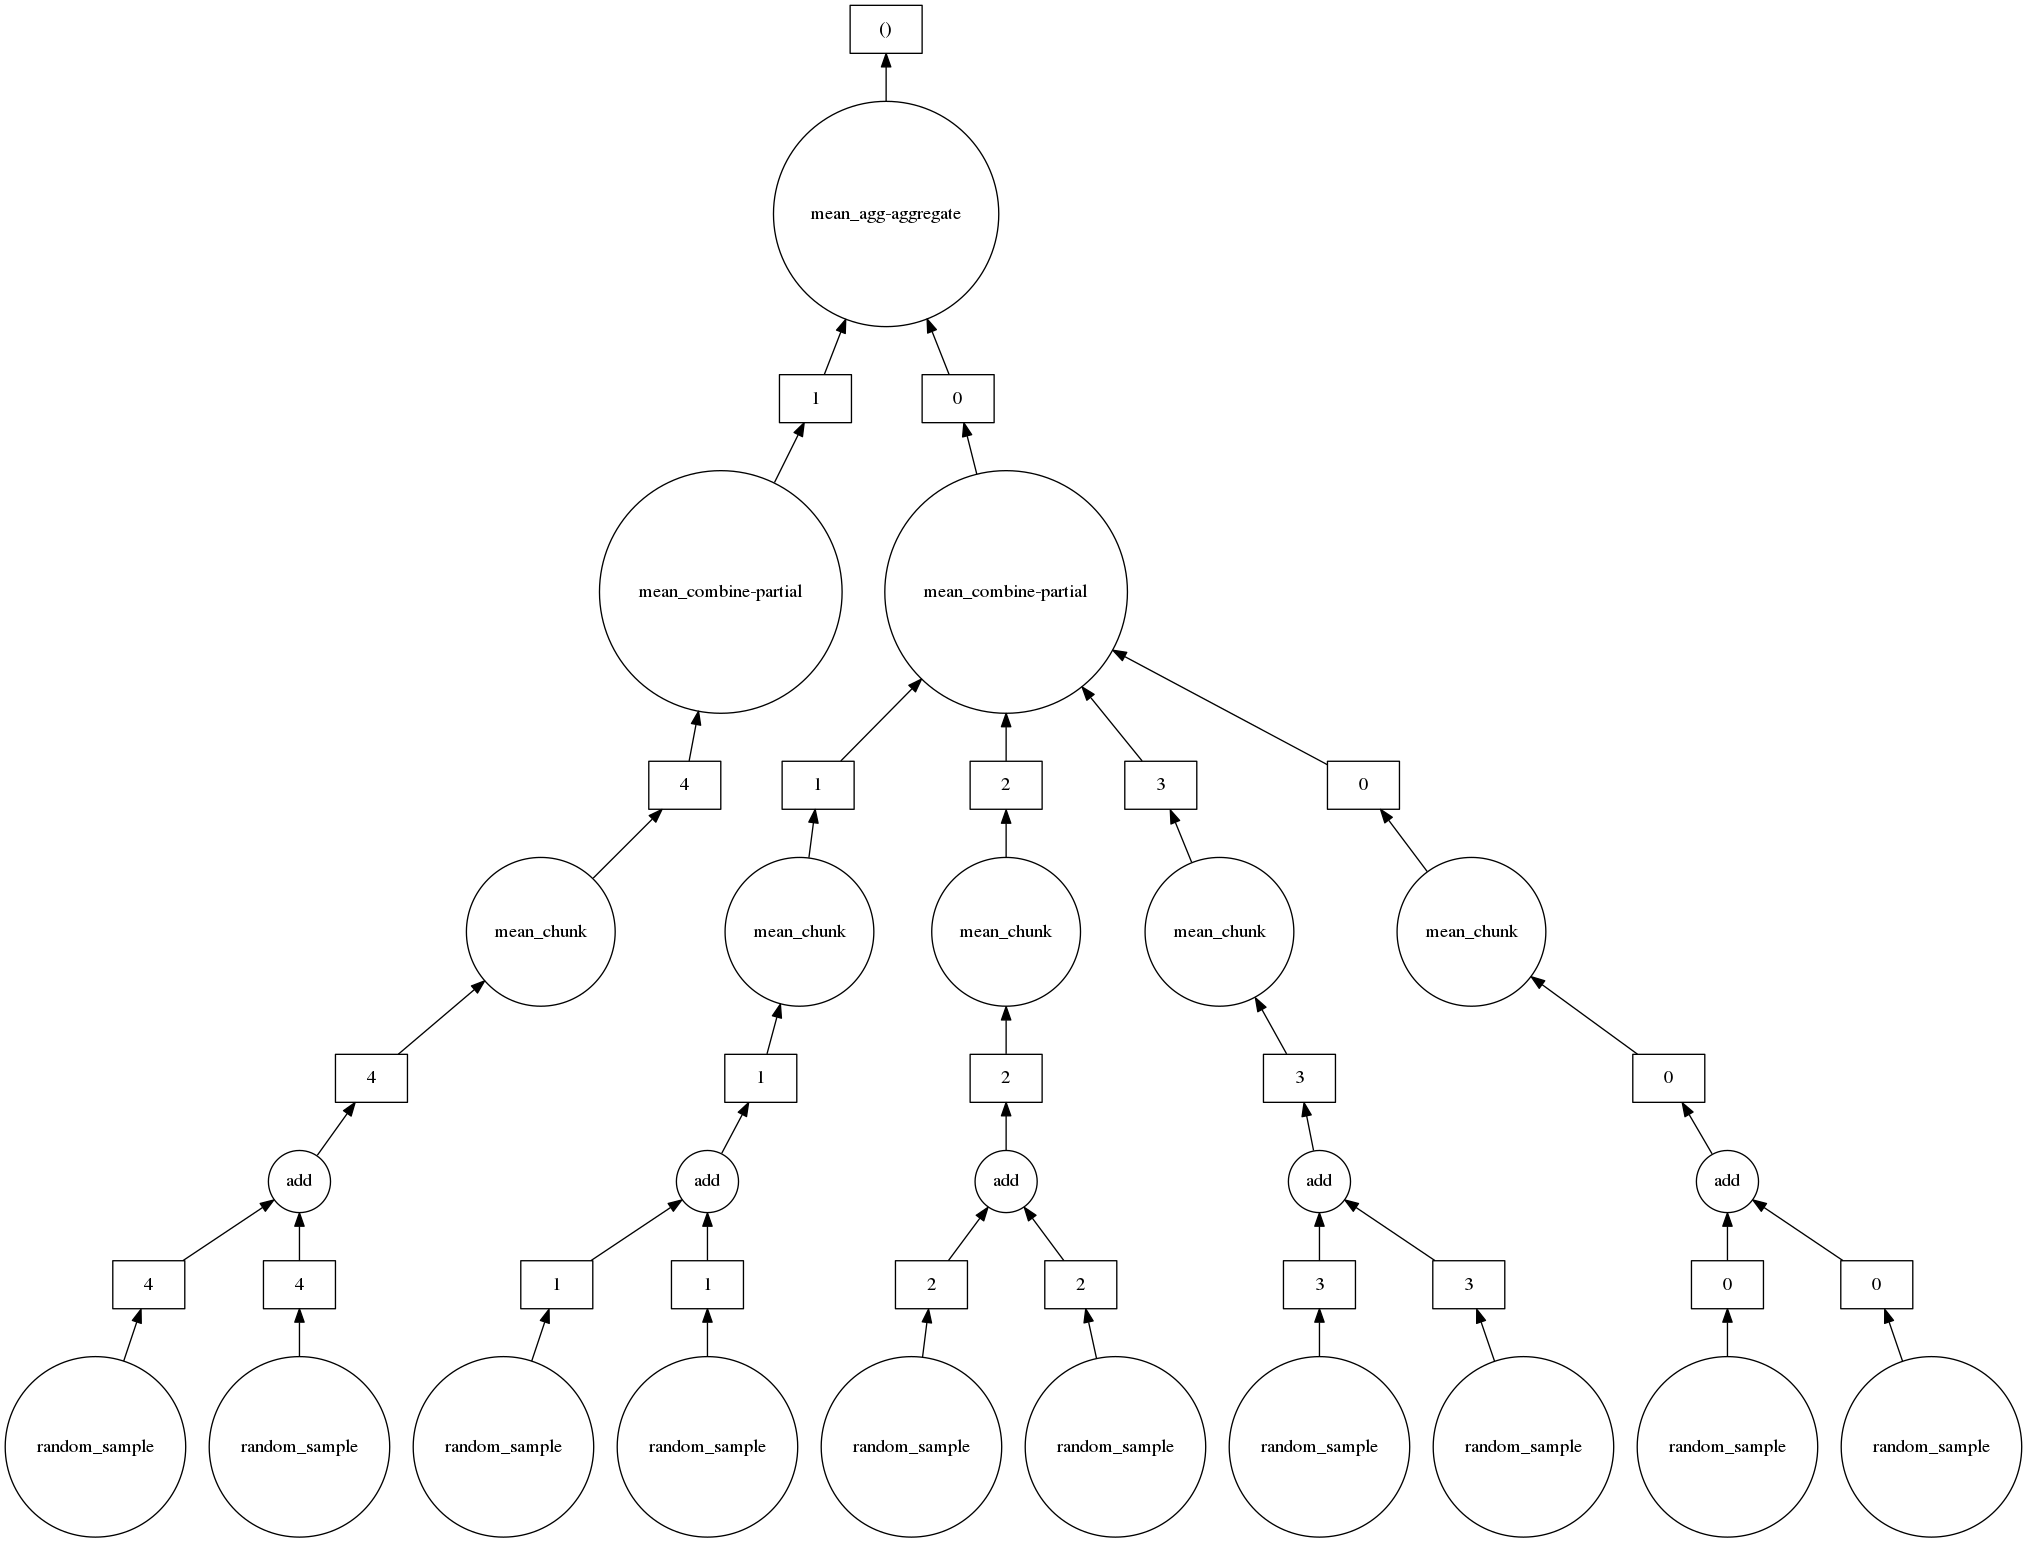

In [31]:
mean_x_y.visualize()

## An example of out-of-memory computation

In [36]:
da_arr_large = da.random.randint(10000, size=(50000, 50000),
                                 chunks=(5000, 1000))   
da_sum_large = da_arr_large.sum()   

### Get no. bytes using `nbytes` : http://docs.dask.org/en/latest/array-api.html#dask.array.Array.nbytes

In [33]:
da_arr_large.nbytes  

20000000000

### Convert bytes to GB, 1Gb = 1e+9 bytes

In [34]:
da_arr_large.nbytes/1e+9

20.0

In [37]:
da_sum_large.compute()

12498734650515